<div class="markdown-google-sans">
  <h1>Welcome to Colab!</h1>
</div>

<div class="markdown-google-sans">
  <h2>&#40;New&#41; Try the Gemini API</h2>
  <ul>
  <li><a href="https://makersuite.google.com/app/apikey">Generate a Gemini API key</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Talk_to_Gemini_with_Google%27s_Speech_to_Text_API.ipynb?utm_medium=link&utm_campaign=gemini">Talk to Gemini with the Speech-to-Text API</a></li>
  <li><a href="https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/tutorials/quickstart_colab.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API: Quickstart with Python</a></li>
  <li><a href="https://colab.research.google.com/notebooks/snippets/gemini.ipynb?utm_medium=link&utm_campaign=gemini">Gemini API code sample</a></li>
  <li><a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/Learning_with_Gemini_and_ChatGPT.ipynb?utm_medium=link&utm_campaign=gemini">Compare Gemini with ChatGPT</a></li>  
  <li><a href="https://colab.google/notebooks/?utm_medium=link&utm_campaign=gemini">More notebooks</a></li>
  </ul>
</div>


If you're already familiar with Colab, check out this video to learn about interactive tables, the executed code history view and the command palette.

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  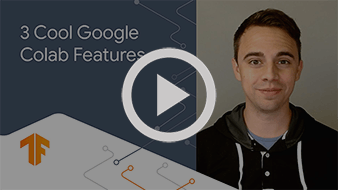
  </a>
</center>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
housing = pd.read_csv('Housing.csv')
import seaborn as sns
housing

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [7]:
housing_encoded = housing.copy()
categorical_vars = ['airconditioning', 'prefarea', 'mainroad', 'guestroom','basement',"hotwaterheating"]
for var in categorical_vars:
    housing_encoded[var] = housing_encoded[var].map({'yes': 1, 'no': 0})
housing_encoded['furnishingstatus_encoded'] = housing['furnishingstatus'].map({
    'furnished': 0,
    'semi-furnished': 1,
    'unfurnished': 2
})


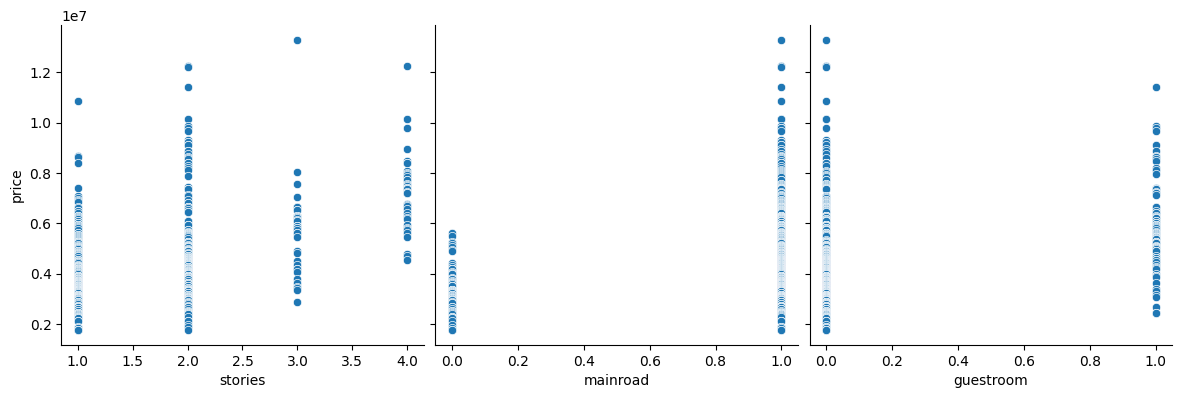

In [8]:
sns.pairplot(housing_encoded,x_vars=["stories",'mainroad','guestroom'],y_vars='price',kind='scatter',height=4)
plt.show()

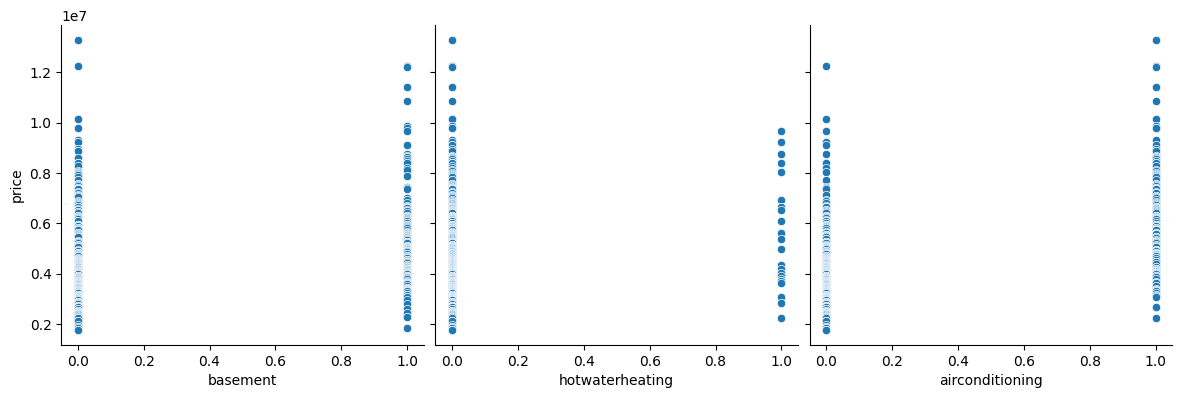

In [9]:
sns.pairplot(housing_encoded,x_vars=['basement','hotwaterheating','airconditioning'],y_vars='price',kind='scatter',height=4)
plt.show()

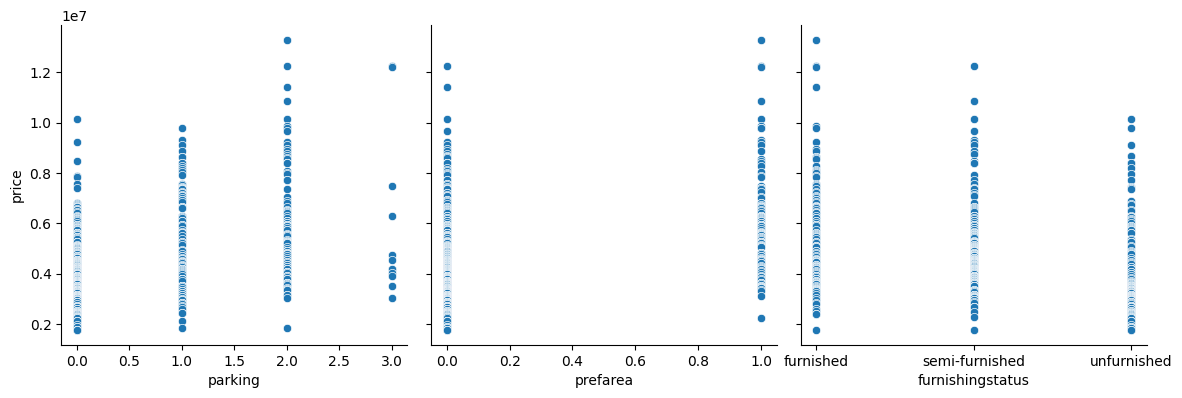

In [10]:
sns.pairplot(housing_encoded,x_vars=['parking','prefarea','furnishingstatus'],y_vars='price',kind='scatter',height=4)
plt.show()

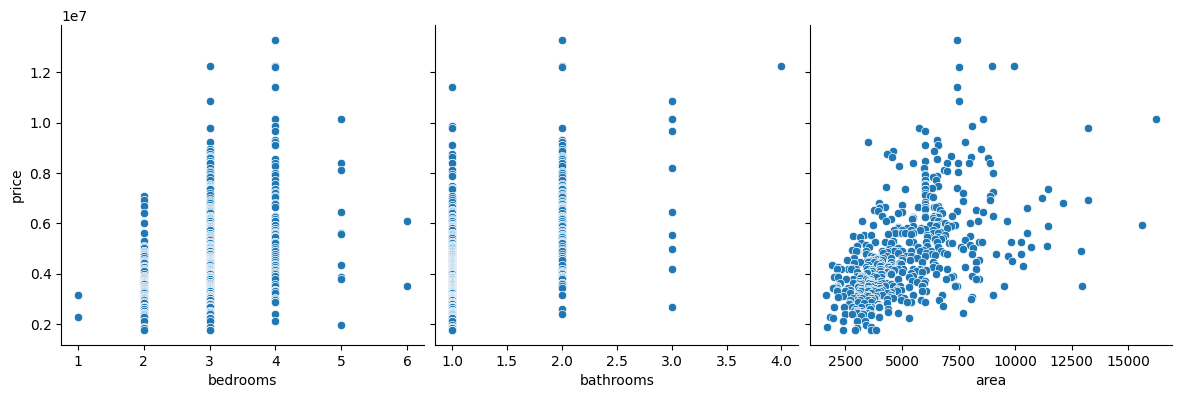

In [11]:
sns.pairplot(housing_encoded,x_vars=['bedrooms','bathrooms','area'],y_vars='price',kind='scatter',height=4)
plt.show()

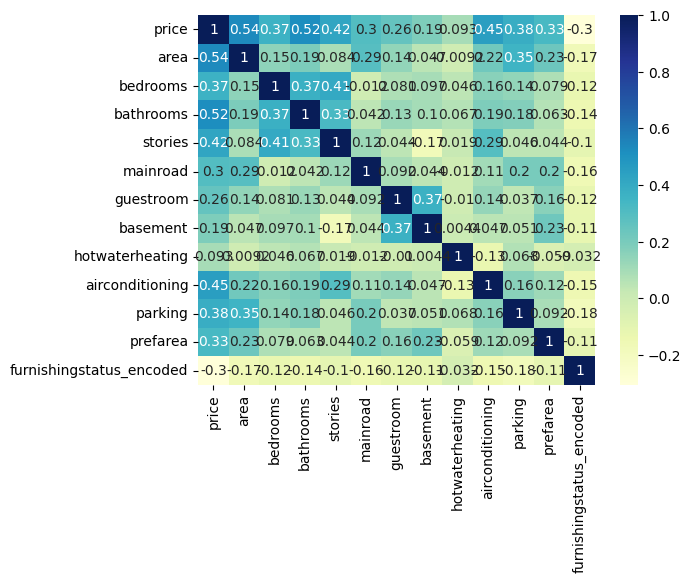

In [12]:
numeric_housing = housing_encoded.select_dtypes(include=['number'])
sns.heatmap( numeric_housing.corr(), cmap = 'YlGnBu', annot = True )
plt.show()

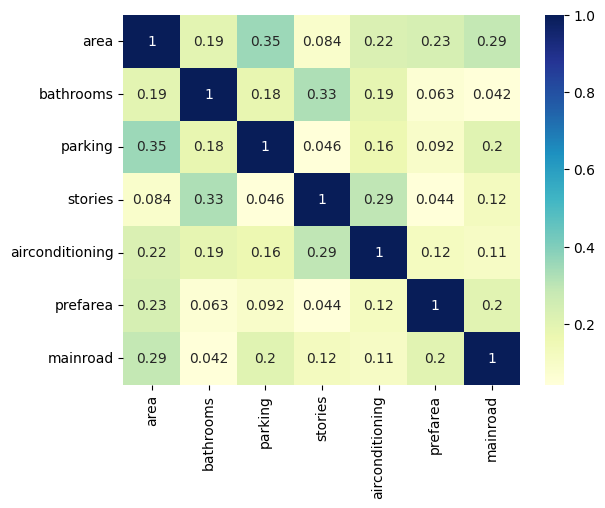

In [13]:
numeric_housing = housing_encoded[['area', 'bathrooms', 'parking', 'stories','airconditioning','prefarea','mainroad']]
sns.heatmap( numeric_housing.corr(), cmap = 'YlGnBu', annot = True )
plt.show()

In [14]:
x = housing_encoded[['area', 'bathrooms', 'parking', 'stories','airconditioning','prefarea','mainroad']]
y = housing_encoded['price']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,train_size=0.8, test_size=0.2, random_state=100)

In [15]:
print(x_train.shape)
print(y_train.shape)

(436, 7)
(436,)


In [16]:
import statsmodels.api as sm
x_train_sm = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_sm).fit()

In [17]:
lr.params

,0
const,-1.154556e+05
area,2.572559e+02
bathrooms,1.304017e+06
parking,2.694146e+05
stories,4.075502e+05
airconditioning,8.403311e+05
prefarea,6.849366e+05
mainroad,6.425658e+05


In [18]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     108.8
Date:                Mon, 09 Dec 2024   Prob (F-statistic):           6.94e-91
Time:                        12:36:21   Log-Likelihood:                -6691.2
No. Observations:                 436   AIC:                         1.340e+04
Df Residuals:                     428   BIC:                         1.343e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.155e+05   2.21e+05     

In [19]:
x_test_sm = sm.add_constant(x_test)
y_pred = lr.predict(x_test_sm)

In [20]:
y_pred

,0
265,4.072061e+06
54,6.603526e+06
171,5.834790e+06
244,4.699766e+06
268,4.759976e+06
...,...
451,3.975155e+06
320,4.981339e+06
424,2.801155e+06
338,3.618655e+06


In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_log_error
import numpy as np

In [22]:
print( "MSE: ",np.sqrt( mean_squared_error( y_test, y_pred )))
print( "R-squared: ",r2_score( y_test, y_pred ) )
print( "MAE: ",mean_absolute_error(y_test, y_pred) )
print( "MAPE: ",mean_absolute_percentage_error(y_test, y_pred))
print("MSLE:",mean_squared_log_error(y_test, y_pred))

MSE:  1128768.0253312218
R-squared:  0.6390071791997212
MAE:  832800.7183652063
MAPE:  0.20087042756989865
MSLE: 0.06344893604381573


In [23]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit( x_train, y_train)

LinearRegression()

In [24]:
print(lr.coef_)
print(lr.intercept_)

[2.57255920e+02 1.30401715e+06 2.69414589e+05 4.07550222e+05
 8.40331079e+05 6.84936555e+05 6.42565765e+05]
-115455.57509057224


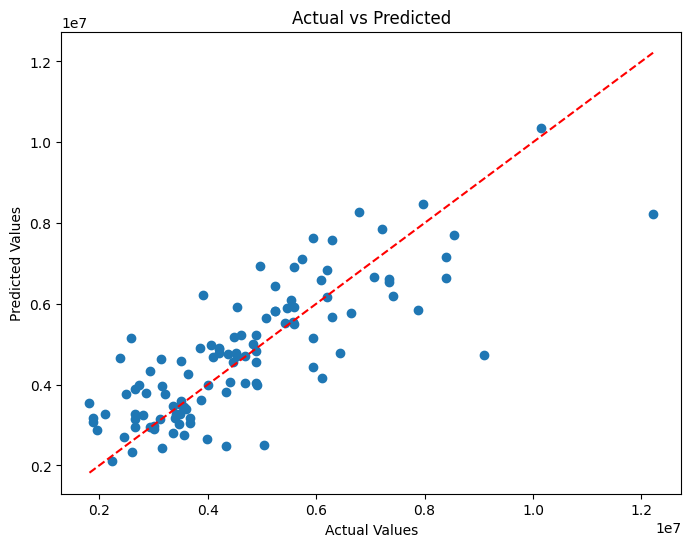

In [25]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()
